# Squeeze and Exitation Network
## Reference:
[Squeeze-and-Excitation Networks](https://arxiv.org/abs/1709.01507)

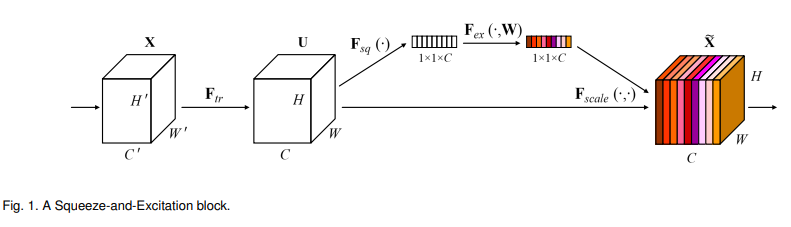

In [4]:
import tensorflow as tf
from tensorflow.keras import layers as KL

In [6]:
def se_block(input_tensor: tf.Tensor, r: int)->tf.Tensor:
  Cin = input_tensor.shape[-1]
  squeeze = int(Cin / r)

  # Squeeze phase
  x = KL.GlobalAveragePooling2D()(input_tensor)
  x = KL.Reshape((1, 1, Cin))(x)

  # Exitation phase
  x = KL.Conv2D(filters=squeeze, kernel_size=(1, 1), activation='relu')(x)
  x = KL.Conv2D(filters=Cin, kernel_size=(1, 1), activation='sigmoid')(x)

  # Rescale phase
  x = KL.multiply([x, input_tensor])
  return x

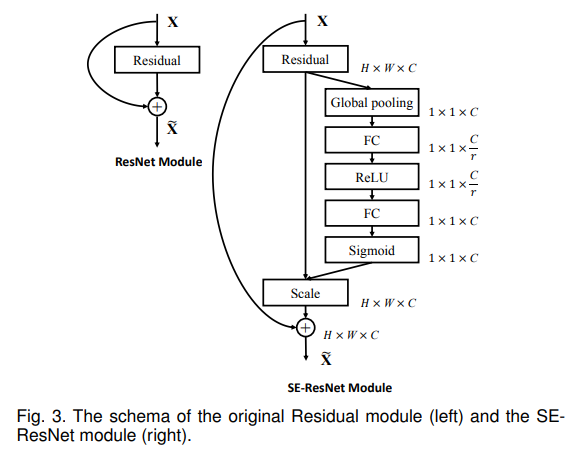

In [7]:
def se_res_block(input_tesner: tf.Tensor, num_filter: list, stride: int, r: int) -> tf.Tensor:
  f1, f2, f3 = num_filter
  # residual
  x = KL.BatchNormalization()(input_tensor)
  x = KL.ReLU()(x)
  x = KL.Conv2D(filters=f1, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
  x = KL.BatchNormalization()(input_tensor)
  x = KL.ReLU()(x)
  x = KL.Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = KL.BatchNormalization()(input_tensor)
  x = KL.ReLU()(x)
  x = KL.Conv2D(filters=f3, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)

  # se
  se = KL.GlobalAveragePooling2D()(x)
  se = KL.Reshape((1, 1, f3))(se)
  se = KL.Conv2d(filters=int(f3 / r), kernel_size=(1, 1), strides=(1, 1), activation='relu')(se)
  se = KL.Conv2D(filters=f3, kernel_size=(1, 1), strdies=(1, 1), activation='sigmoid')(se)
  se = KL.muliply([x, se])

  # identiy
  out = KL.add([input_tensor, se])
  return out